Мышковец С.А., v.1 19.01.2023

Решение задачи: Трансфероное обучение. 

Используя предобученные нейронные сети для задачи классификации изображений, подобрать модель таким образом, чтобы метрики качества были максимальны. 

Вывести графики обучения. Проанализировать результат. 
В ГИТ модель не пихать!

Вывод:

fast ai из коробки на resnet34 на 5 эпохах показала roc auc на тестовых данных - 99%. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
from matplotlib import pyplot as plt
# plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'

# from sklearn import metrics
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import validation_curve, learning_curve

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 17

# Описание набора данных

18726 изображений букв 'I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B' по папкам с соответствующими именами.

In [3]:
import os
os.getcwd()

'/Users/sviatlanamyshkavets/Documents/Courses/DS TM/DS3onl/Sviatlana Myshkavets/ДЗ28_Мышковец С.А.'

In [5]:
os.listdir("../ДЗ28_Мышковец С.А.")

['.DS_Store', 'Untitled.ipynb', 'notMNIST_small', '.ipynb_checkpoints']

In [8]:
os.listdir("../ДЗ28_Мышковец С.А./notMNIST_small")

['.DS_Store', 'I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B']

In [7]:
path = '../ДЗ28_Мышковец С.А./notMNIST_small'

In [10]:
fnames = []
for root, dir, files in os.walk(path):
    for f in files:
        if f.endswith('.png'):
            fnames.append(os.path.join(root, f))

In [12]:
fnames[:10]

['../ДЗ28_Мышковец С.А./notMNIST_small/I/Qml0d2lzZS50dGY=.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/RW5nbGFuZCBCb2xkSXRhbGljLnR0Zg==.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/R3JlZWsgSXRhbGljLnR0Zg==.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/Rmx5d2hlZWxTcXVhcmUudHRm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/SGFuZGljYXAub3Rm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/Q29uY29yZGVCRS1Cb2xkQ24ub3Rm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/QnJpZGdld29ya0EudHRm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/QW5pc2V0dGUtTGlnaHQub3Rm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/RmlnaHQgVGhpcy50dGY=.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/QXJyb3dFeHRyYUJvbGQub3Rm.png']

In [13]:
len(fnames)

18726

# Глубокое обучение быстро при помощи Fast AI

**fast ai представляет собой надстройку над фреймворком pytorch и упрощает и ускоряет работу с ним.**

In [42]:
# pip install fastai

In [2]:
from fastai.vision.all import *

In [43]:
# указывем путь к сохранённым изображениям

In [ ]:
path = '../ДЗ28_Мышковец С.А./notMNIST_small'

In [44]:
# возвращаем название папки, в которой находится конкретное изображение

In [4]:
label_function = lambda f: str(f).split("/")[-2]

Создаём объект класса DataBlock, являющийся контейнером, содержащим информацию о наших данных и о предобработке, которую нужно осуществить:

In [5]:
letters = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                    get_items=get_image_files, # название функции, которая выбирает все находящиеся в папке images изображения
                    splitter=RandomSplitter(), # как разделить выборку на тренировочную и тестовую (в данном случае – рандомно)
                    get_y=label_function,      # функция для разметки изображений обучающей выборки
                    item_tfms=Resize(224, method=ResizeMethod.Pad))# Параметр item_tfms – как обработать изображения, 
                    # здесь мы уменьшаем изображения до размера 224х224 (все изображения должны быть одного размера) и 
                    # указываем метод, применяемый для изменения размера. 
                    # ResizeMethod.Pad заполнит «пустые» части изображения (у большинства изображений не совпадает ширина и 
                    # высота) зеркально, относительно границы изображения

In [ ]:
# Вызываем метод dataloaders() и передаём путь к папке с изображениями. Это подготовит данные для модели. 

In [22]:
loader = letters.dataloaders(path)

In [23]:
# Теперь мы можем посмотреть, верно ли прошла разметка

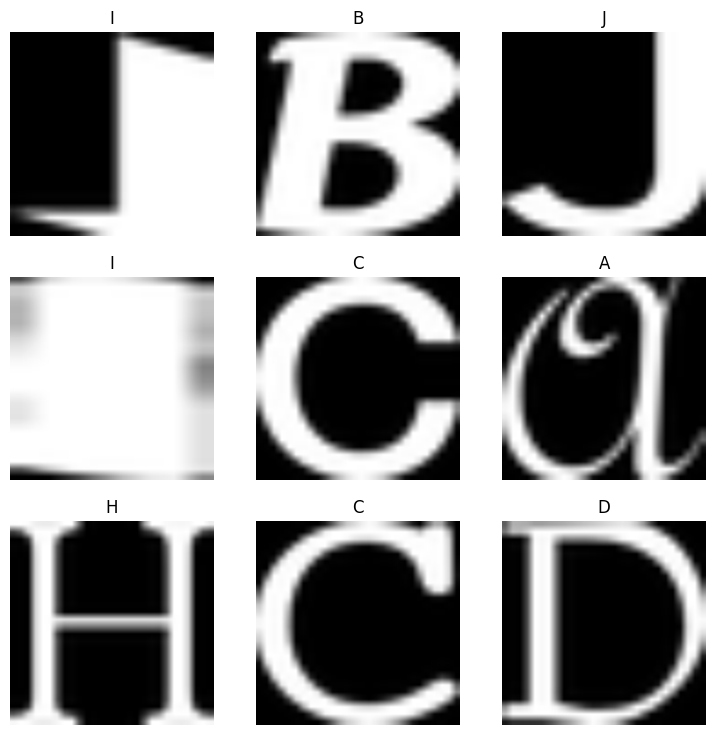

In [24]:
loader.show_batch(max_n=9)

In [45]:
# Библиотека fast ai предоставляет возможность сконфигурировать свою нейронную сеть, но мы в данном примере воспользуемся 
# предобученной свёрточной нейросетью resnet34, которая подходит для классификации изображений

In [25]:
learn = cnn_learner(loader, resnet34, metrics=error_rate)

In [46]:
# Параметры cnn_learner:
    
#    dls (объект data loaders) - выше loader
#    arch (архитектура нейронной сети) - выше resnet34
#    metrics (метрики) - выше error_rate (1 - accuracy: computes accuracy with targ when pred is bs * n_classes)
#    opt_func - оптимизатор
# По умолчанию, предлагается использовать оптимизатор Adam. В fast ai помимо Adam реализованы SGD, RMSProp, RAdam, QHAdam, 
# LARS/LARC, LAMB.

# Продолжим с оптимизатором Adam, вызываем метод fine_tune для обучения нейронки под нашу задачу:

In [26]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.724623,0.435820,0.126437,02:00


epoch,train_loss,valid_loss,error_rate,time
0,0.326189,0.205176,0.061214,03:16
1,0.213298,0.193949,0.054531,03:16
2,0.162176,0.182548,0.052927,03:15
3,0.130826,0.159821,0.044908,03:14
4,0.073011,0.142672,0.036889,03:14
5,0.047013,0.157137,0.037156,03:14
6,0.023084,0.145242,0.034215,05:33
7,0.009510,0.139177,0.032077,03:13
8,0.002779,0.139531,0.030740,03:13
9,0.003089,0.140299,0.031275,03:13


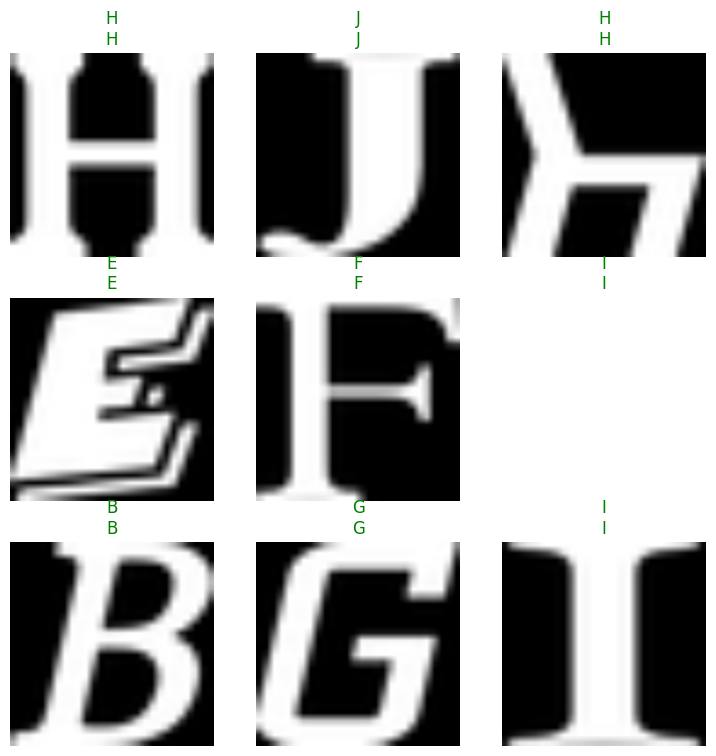

In [27]:
learn.show_results()

In [30]:
# Теперь мы можем попробовать классифицировать изображение с буквой, которого не было в исходной выборке, 
# вызвав метод predict и передав путь к изображению

In [28]:
learn.predict(item='../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 2.png')

('C',
 TensorBase(2),
 TensorBase([1.0013e-09, 8.9893e-10, 9.9999e-01, 9.5642e-07, 4.0399e-06,
             3.6778e-08, 2.9195e-06, 8.1634e-10, 1.3242e-08, 5.2368e-08]))

In [ ]:
# Модель классифицирована верно, вероятность составила 99%.

In [37]:
from PIL import Image
import numpy as np
import cv2

In [38]:
imageFile = "../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 2.png"
image = Image.open(imageFile)
image

In [29]:
learn.predict(item='../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 21.08.12.png')

('E',
 TensorBase(4),
 TensorBase([4.7856e-11, 1.5118e-07, 1.1932e-07, 1.7080e-10, 1.0000e+00,
             8.7100e-09, 3.0355e-09, 4.8994e-10, 3.5693e-09, 2.6024e-11]))

In [ ]:
# Модель классифицирована верно, вероятность составила 100%.

In [39]:
imageFile = "../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 21.08.12.png"
image = Image.open(imageFile)
image

In [51]:
# call an instance of metric first. In general, everything that begins with a capital needs to be instantiated 
# (we are naming functions that needs to be called with a capital too, to help with that).

rocauc = RocAuc()

In [52]:
learn_auc = cnn_learner(loader, resnet34, metrics=rocauc)

In [53]:
learn_auc.fine_tune(5)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.762920,0.440184,0.988868,02:02


epoch,train_loss,valid_loss,roc_auc_score,time
0,0.310954,0.206683,0.997419,03:16
1,0.213552,0.164129,0.998428,03:16
2,0.118523,0.157708,0.998634,03:15
3,0.053063,0.131128,0.999108,03:15
4,0.017763,0.131890,0.999128,03:16


In [54]:
learn_auc.predict(item='../ДЗ28_Мышковец С.А./Test/MTAuMTUgU2F0dXJkYXkgTmlnaHQgQlJLLnR0Zg==.png')

('G',
 TensorBase(6),
 TensorBase([3.4064e-05, 6.4343e-04, 4.8626e-06, 8.8265e-06, 1.4191e-05,
             3.7301e-06, 9.9889e-01, 2.9689e-05, 2.6703e-05, 3.4300e-04]))

In [59]:
# Модель классифицирована верно, вероятность составила 99%.

In [55]:
imageFile = "../ДЗ28_Мышковец С.А./Test/MTAuMTUgU2F0dXJkYXkgTmlnaHQgQlJLLnR0Zg==.png"
image = Image.open(imageFile)
image

In [56]:
learn_auc.predict(item='../ДЗ28_Мышковец С.А./Test/R290aGljSWxsdW1pbmF0ZS50dGY=.png')

('H',
 TensorBase(7),
 TensorBase([0.0207, 0.1595, 0.0291, 0.0050, 0.0981, 0.0615, 0.0495, 0.3351,
             0.1202, 0.1212]))

In [58]:
# Модель классифицирована верно, вероятность составила 33%.

In [57]:
imageFile = "../ДЗ28_Мышковец С.А./Test/R290aGljSWxsdW1pbmF0ZS50dGY=.png"
image = Image.open(imageFile)
image